In [13]:
# Library

import pandas as pd
import numpy as np
import requests
import string

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [25]:
import pandas as pd

# Read the CSV file with escape encoding
data = pd.read_csv('Data_berita.csv', encoding='unicode_escape')

# Display the first few rows of the data
data=data[:200]
data


,judul,isi,kategori
0,Baekhyun EXO Berikan Contoh Baik Pencegahan Vi...,- Virus corona saat ini tengah menjadi perbin...,non_clickbait
1,Lee Seung Gi Akhirnya Beri Kabar Setelah Dicar...,- Virus corona sampai sekarang masih banyak d...,clickbait
2,"UPDATE: Jaejoong JYJ Ngaku Kena Corona, Idol K...",- Jaejoong JYJ menuliskan pengumuman yang men...,clickbait
3,"Virus Corona Masuk ke Korea, Kenapa Banyak Ora...",- Dunia sedang dibuat khawatir dengan adanya ...,clickbait
4,"16 Seleb yang Lagunya Bertema Virus Corona, Ad...",- Self quarantine untuk menghindari virus cor...,non_clickbait
...,...,...,...
195,"Vaksin Corona Sinovac Tiba, Didoakan Aman Medi...", Wakil Ketua MPR Hidayat Nur Wahid (HNW) ber...,clickbait
196,"Patgulipat Bansos COVID-19, Hak Rakyat Dikorup...", Masih tak habis pikir dengan jalan pikiran ...,non_clickbait
197,Moderna Siap Produksi 500 Juta Dosis Vaksin CO...," Chief Executive Officer (CEO) Moderna, Step...",non_clickbait
198,Kemendikbud: Ada Tiga Kunci Hadapi Pandemi," Terkait masalah pendidikan, Direktur Jender...",non_clickbait


In [15]:
# Preprocessing

def to_lower(text):
    return text.lower()

def remove_punct(text):
    return ''.join(c for c in text if c not in string.punctuation)

def to_strip(text):
    return " ".join(text.split())

def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output


In [16]:
# Remove Stopwords

## Stopwords From Sastrawi 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

## List Of Another Stopwords
def stopwords():
    r = requests.get("https://raw.githubusercontent.com/masdevid/ID-Stopwords/master/id.stopwords.02.01.2016.txt").text
    data = []
    for x in r.split("\n"):
        data.append(x)
    return data

# Manually Input Stopwords 
more_stopword = ['nya','kali','sih','yg','tidaknya','mah','lah','kok','yah','bah','bro','sis','sist','dong','tuh','oh','begitu'
                ,'pas','donk','dongs','hehe','haha','hihi','dih','duh','wah','ya','yah','eh','deh','dah','wkwk','wow','si','guys','gaes','mba','mbak','mas'
                ,'bang','kak','mah','yuk','bet','loh','lho','woy','doang','tuh','euy','kakak','yuhu','aku','gw','gue','gua','elu','lu','kamu','yang','kalau'
                ,'kalo','kita','gitu','aja','saja','abang','ah','ih','hey','hai','pubg','jt','om','nggak','ngga','engga','reuters'
                ,'lu','mbak','aa','aaa','abg','adi','ahh','yaelah','ajah','alah','an','sm','ama','la','ai','abis','aduhai','ak','amd'
                ,'and','ap','spiral','khusna','woi','aduh','aw','awokwok','woi','ayo','bal','adakan','adain'
                ,'liputan6com','indozoneid','detikcom','detiktravel','detikinet','detikhot','detikers','inipasticom','jpnncom','indozoneid','uzoneid'
                ,'jawaposcom','bisniscom','kompascom','viva','tempoco','inewsid','republikacoid','merdekacom']

# Combine All
stopwordplus = factory.get_stop_words()+stopwords()+more_stopword

# Function
def remove_stopwords(text):
    return ' '.join([w for w in text.split() if not w in stopwordplus])


In [17]:
# Stemming

stemmer = StemmerFactory().create_stemmer()

def kata_stem(teks):
    stem_teks = " ".join([stemmer.stem(i) for i in teks.split()])
    return stem_teks


In [18]:
# Callback All Function

def preprocesing_all (text) :
    pre = to_lower(text)
    pre = remove_punct(pre)
    pre = to_strip(pre)
    pre = remove_numbers(pre)
    pre = remove_stopwords(pre)
    pre = kata_stem(pre)
    
    return pre

In [19]:
# Testing Functuion

preprocesing_all('Saya adalah Manusia BiAsAA')

'manusia biasaa'

In [26]:
def to_lower(text):
    if isinstance(text, str):  # Check if the value is a string
        return text.lower()
    else:
        return text

# Apply the preprocessing function to the 'judul' column
data['Processing'] = data['judul'].apply(to_lower)
data.head()


,judul,isi,kategori,Processing
0,Baekhyun EXO Berikan Contoh Baik Pencegahan Vi...,- Virus corona saat ini tengah menjadi perbin...,non_clickbait,baekhyun exo berikan contoh baik pencegahan vi...
1,Lee Seung Gi Akhirnya Beri Kabar Setelah Dicar...,- Virus corona sampai sekarang masih banyak d...,clickbait,lee seung gi akhirnya beri kabar setelah dicar...
2,"UPDATE: Jaejoong JYJ Ngaku Kena Corona, Idol K...",- Jaejoong JYJ menuliskan pengumuman yang men...,clickbait,"update: jaejoong jyj ngaku kena corona, idol k..."
3,"Virus Corona Masuk ke Korea, Kenapa Banyak Ora...",- Dunia sedang dibuat khawatir dengan adanya ...,clickbait,"virus corona masuk ke korea, kenapa banyak ora..."
4,"16 Seleb yang Lagunya Bertema Virus Corona, Ad...",- Self quarantine untuk menghindari virus cor...,non_clickbait,"16 seleb yang lagunya bertema virus corona, ad..."


In [28]:
# Model

data['Label_Encode'] = np.where(data['kategori'] == 'clickbait', 1,0)

xtrain, xtest, ytrain, ytest = train_test_split(
    data['Processing'],
    data['Label_Encode'],
    stratify=data['Label_Encode']
)

vectorizer = TfidfVectorizer()
model = DecisionTreeClassifier()

pipe = Pipeline([
    ('prepros', vectorizer),
    ('model', model)
])

pipe.fit(xtrain, ytrain)
pred = pipe.predict(xtest)
print(classification_report(ytest, pred))


              precision    recall  f1-score   support

           0       0.78      0.97      0.86        39
           1       0.00      0.00      0.00        11

    accuracy                           0.76        50
   macro avg       0.39      0.49      0.43        50
weighted avg       0.60      0.76      0.67        50



c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

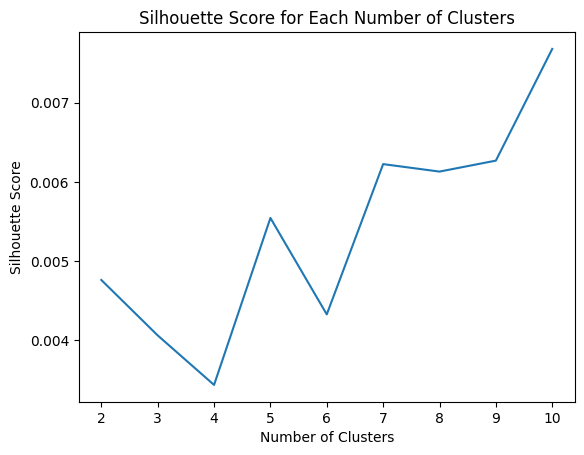

In [30]:
#Cluster

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X = vectorizer.fit_transform(data['judul'])

# Perform K-means clustering for different number of clusters
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Each Number of Clusters')
plt.show()

In [32]:
# Apply K-means clustering
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Add cluster labels to the data
data['Cluster'] = kmeans.labels_

# Display the clustered data
data[['judul', 'Cluster']]

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,judul,Cluster
0,Baekhyun EXO Berikan Contoh Baik Pencegahan Vi...,1
1,Lee Seung Gi Akhirnya Beri Kabar Setelah Dicar...,5
2,"UPDATE: Jaejoong JYJ Ngaku Kena Corona, Idol K...",4
3,"Virus Corona Masuk ke Korea, Kenapa Banyak Ora...",5
4,"16 Seleb yang Lagunya Bertema Virus Corona, Ad...",4
...,...,...
195,"Vaksin Corona Sinovac Tiba, Didoakan Aman Medi...",4
196,"Patgulipat Bansos COVID-19, Hak Rakyat Dikorup...",1
197,Moderna Siap Produksi 500 Juta Dosis Vaksin CO...,4
198,Kemendikbud: Ada Tiga Kunci Hadapi Pandemi,1
